In [190]:
import os
import pandas as pd
import regex as re
import textwrap
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/Users/tarangkadyan/Documents/Class Notes/brushup_files


### 1. EDA on text data

In [191]:
df_text = pd.read_csv(cwd + '/text_data.csv')       
print(df_text.shape)
df_text.head()


(42, 3)


,country,title,event_type
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened
3,ZWE,High Court Deemed 'Enemy of the State': Contro...,judiciary_weakened
4,VEN,Court Overhaul Clears Path for Sweeping Econom...,judiciary_weakened


In [192]:
# Function to wrap text of a specific cell
def wrap_text(text, width=50):
    """Wrap text to the specified width."""
    return textwrap.fill(text, width)

# Maximum width for line breaks
max_width = 130

# Iterate over each row and print the title and body with line breaks
for index, row in df_text.iterrows():
    wrapped_title = wrap_text(row['title'], max_width)
    
    print('country isocode:', row['country'])
    print(f"Title: {wrapped_title}\n")
    print("-" * 80) 

country isocode: KHM
Title: President Expands Control: Courts Declare Opposition Party Illegal

--------------------------------------------------------------------------------
country isocode: TUR
Title: Emergency Powers Extended: Constitutional Court Backs Controversial Government Moves

--------------------------------------------------------------------------------
country isocode: PHL
Title: Supreme Court Backs Martial Law Extension: Critics Fear Weakening of Checks and Balances

--------------------------------------------------------------------------------
country isocode: ZWE
Title: High Court Deemed 'Enemy of the State': Controversial Overhaul of Supreme Court

--------------------------------------------------------------------------------
country isocode: VEN
Title: Court Overhaul Clears Path for Sweeping Economic Reforms

--------------------------------------------------------------------------------
country isocode: VEN
Title: Judiciary Under Fire: Judges Resign as Gover

In [193]:
df_text['keywords'] = df_text['title'].str.findall(r'\b[A-Z][a-z]+\b')

df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)

df_text['bigrams'] = df_text['title'].str.findall(r'\b\w+\b \b\w+\b')

df_text['word_count_1'] = df_text['title'].str.count(r'\b\w+\b')

df_text['word_count_2'] = df_text['title'].str.split().str.len()

df_text.head(3)


/var/folders/sj/60qhcj1n1zzch8_rq_k0sz940000gn/T/ipykernel_73059/1648143037.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)


,country,title,event_type,keywords,contains_judge,bigrams,word_count_1,word_count_2
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened,"[President, Expands, Control, Courts, Declare,...",False,"[President Expands, Courts Declare, Opposition...",8,8
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened,"[Emergency, Powers, Extended, Constitutional, ...",False,"[Emergency Powers, Constitutional Court, Backs...",9,9
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened,"[Supreme, Court, Backs, Martial, Law, Extensio...",False,"[Supreme Court, Backs Martial, Law Extension, ...",13,13


In [194]:
my_sentence = "Hello, how are you? I'm ok thanks. How are you?"

list_of_words = my_sentence.split()
print(list_of_words)
re.findall(r'\b[A-Z][a-z]+\b', my_sentence)

['Hello,', 'how', 'are', 'you?', "I'm", 'ok', 'thanks.', 'How', 'are', 'you?']


['Hello', 'How']

### 2. Combining data sets

Key Differences:
1. Merge combines two DataFrames based on one or more common columns.
2. Concatenate appends DataFrames along a particular axis.
3. Join combines DataFrames based on their index values.


In [195]:
# example DataFrames
df1 = pd.DataFrame({
    'employee_id': [101, 102, 103],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'employee_id': [101, 103, 104],
    'department': ['HR', 'Engineering', 'Marketing']
})

df3 = pd.DataFrame({
    'name': ['David', 'Eva'],
    'department': ['Finance', 'HR']
})

df4 = pd.DataFrame({
    'salary': [70000, 80000, 60000]
})

# two with the same index
df5 = pd.DataFrame({
    'age': [25, 30, 22],
}, index=['Alice', 'Bob', 'Charlie'])

df6 = pd.DataFrame({
    'salary': [50000, 60000, 55000]
}, index=['Alice', 'Bob', 'Charlie'])

#### Merging

Experiment with the difference the "how" parameter makes:

Your options: how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [196]:
print(df1)
print(df2)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   employee_id   department
0          101           HR
1          103  Engineering
2          104    Marketing


In [197]:
# Merge on 'employee_id'
merged_df = pd.merge(df1, df2, on='employee_id', how = 'inner')
print("Merged DataFrame:")
merged_df

Merged DataFrame:


,employee_id,name,department
0,101,Alice,HR
1,103,Charlie,Engineering


#### Concatenating

In [198]:
print(df1)
print(df3)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
    name department
0  David    Finance
1    Eva         HR


In [199]:
# Concatenate two DataFrames along rows (axis=0)
concatenated_df = pd.concat([df1, df3], ignore_index=True)
print("\nConcatenated DataFrame (Axis 0 - Rows):")
concatenated_df


Concatenated DataFrame (Axis 0 - Rows):


,employee_id,name,department
0,101.0,Alice,NaN
1,102.0,Bob,NaN
2,103.0,Charlie,NaN
3,NaN,David,Finance
4,NaN,Eva,HR


In [200]:
print(df1)
print(df4)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   salary
0   70000
1   80000
2   60000


In [201]:
concatenated_columns_df = pd.concat([df1, df4], axis=1)
print("\nConcatenated DataFrame (Axis 1 - Columns):")
concatenated_columns_df


Concatenated DataFrame (Axis 1 - Columns):


,employee_id,name,salary
0,101,Alice,70000
1,102,Bob,80000
2,103,Charlie,60000


#### Joining

In [202]:
print(df5)
print(df6)

         age
Alice     25
Bob       30
Charlie   22
         salary
Alice     50000
Bob       60000
Charlie   55000


In [203]:
# Join the two DataFrames
joined_df = df5.join(df6)
print("Joined DataFrame (Using Index):")
joined_df

Joined DataFrame (Using Index):


,age,salary
Alice,25,50000
Bob,30,60000
Charlie,22,55000


### 3. More on WB data

#### 3.0 Data

In [204]:
df_WB_data = pd.read_csv(cwd + '/WB_more_data.csv')

In [205]:
# copy the data
df_og = df_WB_data.copy()

# check what series and countries are included
print(df_og['Series Name'].unique())
print(df_og['Country Name'].nunique())
df_og.sample(3)

['Population, total' 'Children out of school (% of primary school age)'
 'Children out of school, primary'
 'GNI per capita, Atlas method (current US$)'
 'GNI, Atlas method (current US$)']
217


,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
431,Children out of school (% of primary school age),SE.PRM.UNER.ZS,"Yemen, Rep.",YEM,39.42387009,..,32.69202042,..,21.8579998,21.4661808,..,..,..
292,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Gibraltar,GIB,..,..,..,..,..,..,..,..,..
42,"Population, total",SP.POP.TOTL,Colombia,COL,39837875,40454050,41057687,45308899,45782417,46237930,51516562,51874024,52085168


In [206]:
df_og.describe()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
count,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
unique,5,5,217,217,797,813,810,875,882,872,869,792,597
top,"Population, total",SP.POP.TOTL,Afghanistan,AFG,..,..,..,..,..,..,..,..,..
freq,217,217,5,5,252,240,242,200,190,206,202,287,477


#### 3.1 Melting and pivoting

In [207]:
# melt the data frame 
year_cols = ['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']

df_melted = pd.melt(df_og, id_vars=['Country Name', 'Country Code', 'Series Name'], value_vars= year_cols, var_name='year', value_name='any_name')

df_melted.sample(5)


,Country Name,Country Code,Series Name,year,any_name
1448,Northern Mariana Islands,MNP,Children out of school (% of primary school age),2002,..
4453,Libya,LBY,"Population, total",2012,5869870
2439,Czechia,CZE,Children out of school (% of primary school age),2003,..
5472,Cote d'Ivoire,CIV,"Population, total",2013,22469268
4424,Haiti,HTI,"Population, total",2012,10108539


In [208]:
## Solution
print(df_melted.shape)
print(df_melted['Series Name'].value_counts())
print(df_melted['year'].value_counts())

print(217*9)
print(217*5)

(9765, 5)
Series Name
Population, total                                   1953
Children out of school (% of primary school age)    1953
Children out of school, primary                     1953
GNI per capita, Atlas method (current US$)          1953
GNI, Atlas method (current US$)                     1953
Name: count, dtype: int64
year
2001    1085
2002    1085
2003    1085
2011    1085
2012    1085
2013    1085
2021    1085
2022    1085
2023    1085
Name: count, dtype: int64
1953
1085


In [209]:
# pivot the data frame
pivoted_df = df_melted.pivot(index=['Country Name', 'Country Code', 'year'], columns='Series Name', values='any_name').reset_index()
print(pivoted_df.shape)
pivoted_df.sample(4)

(1953, 8)


Series Name,Country Name,Country Code,year,Children out of school (% of primary school age),"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
18,Algeria,DZA,2001,2.97668004,129143,1730,54032912761,31200985
1776,Tunisia,TUN,2011,1.975389957,19354,4010,44199173490,11032528
206,Bhutan,BTN,2023,..,..,..,..,787424
207,Bolivia,BOL,2001,0.2514199913,3130,940,8178334218,8746084


#### 3.2 Renaming & missingness

In [210]:
df = pivoted_df.copy()

In [211]:
import os
import pandas as pd
import regex as re
import textwrap
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/Users/tarangkadyan/Documents/Class Notes/brushup_files


### 1. EDA on text data

In [212]:
df_text = pd.read_csv(cwd + '/text_data.csv')
print(df_text.shape)
df_text.head()

(42, 3)


,country,title,event_type
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened
3,ZWE,High Court Deemed 'Enemy of the State': Contro...,judiciary_weakened
4,VEN,Court Overhaul Clears Path for Sweeping Econom...,judiciary_weakened


In [213]:
# Function to wrap text of a specific cell
def wrap_text(text, width=50):
    """Wrap text to the specified width."""
    return textwrap.fill(text, width)

# Maximum width for line breaks
max_width = 130

# Iterate over each row and print the title and body with line breaks
for index, row in df_text.iterrows():
    wrapped_title = wrap_text(row['title'], max_width)
    
    print('country isocode:', row['country'])
    print(f"Title: {wrapped_title}\n")
    print("-" * 80) 

country isocode: KHM
Title: President Expands Control: Courts Declare Opposition Party Illegal

--------------------------------------------------------------------------------
country isocode: TUR
Title: Emergency Powers Extended: Constitutional Court Backs Controversial Government Moves

--------------------------------------------------------------------------------
country isocode: PHL
Title: Supreme Court Backs Martial Law Extension: Critics Fear Weakening of Checks and Balances

--------------------------------------------------------------------------------
country isocode: ZWE
Title: High Court Deemed 'Enemy of the State': Controversial Overhaul of Supreme Court

--------------------------------------------------------------------------------
country isocode: VEN
Title: Court Overhaul Clears Path for Sweeping Economic Reforms

--------------------------------------------------------------------------------
country isocode: VEN
Title: Judiciary Under Fire: Judges Resign as Gover

In [214]:
df_text['keywords'] = df_text['title'].str.findall(r'\b[A-Z][a-z]+\b')

df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)

df_text['bigrams'] = df_text['title'].str.findall(r'\b\w+\b \b\w+\b')

df_text['word_count_1'] = df_text['title'].str.count(r'\b\w+\b')

df_text['word_count_2'] = df_text['title'].str.split().str.len()

df_text.head(3)


/var/folders/sj/60qhcj1n1zzch8_rq_k0sz940000gn/T/ipykernel_73059/1648143037.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)


,country,title,event_type,keywords,contains_judge,bigrams,word_count_1,word_count_2
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened,"[President, Expands, Control, Courts, Declare,...",False,"[President Expands, Courts Declare, Opposition...",8,8
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened,"[Emergency, Powers, Extended, Constitutional, ...",False,"[Emergency Powers, Constitutional Court, Backs...",9,9
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened,"[Supreme, Court, Backs, Martial, Law, Extensio...",False,"[Supreme Court, Backs Martial, Law Extension, ...",13,13


In [215]:
my_sentence = "Hello, how are you? I'm ok thanks. How are you?"

list_of_words = my_sentence.split()
print(list_of_words)
re.findall(r'\b[A-Z][a-z]+\b', my_sentence)

['Hello,', 'how', 'are', 'you?', "I'm", 'ok', 'thanks.', 'How', 'are', 'you?']


['Hello', 'How']

### 2. Combining data sets

Key Differences:
1. Merge combines two DataFrames based on one or more common columns.
2. Concatenate appends DataFrames along a particular axis.
3. Join combines DataFrames based on their index values.


In [216]:
# example DataFrames
df1 = pd.DataFrame({
    'employee_id': [101, 102, 103],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'employee_id': [101, 103, 104],
    'department': ['HR', 'Engineering', 'Marketing']
})

df3 = pd.DataFrame({
    'name': ['David', 'Eva'],
    'department': ['Finance', 'HR']
})

df4 = pd.DataFrame({
    'salary': [70000, 80000, 60000]
})

# two with the same index
df5 = pd.DataFrame({
    'age': [25, 30, 22],
}, index=['Alice', 'Bob', 'Charlie'])

df6 = pd.DataFrame({
    'salary': [50000, 60000, 55000]
}, index=['Alice', 'Bob', 'Charlie'])

#### Merging

Experiment with the difference the "how" parameter makes:

Your options: how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [217]:
print(df1)
print(df2)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   employee_id   department
0          101           HR
1          103  Engineering
2          104    Marketing


In [218]:
# Merge on 'employee_id'
merged_df = pd.merge(df1, df2, on='employee_id', how = 'inner')
print("Merged DataFrame:")
merged_df

Merged DataFrame:


,employee_id,name,department
0,101,Alice,HR
1,103,Charlie,Engineering


#### Concatenating

In [219]:
print(df1)
print(df3)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
    name department
0  David    Finance
1    Eva         HR


In [220]:
# Concatenate two DataFrames along rows (axis=0)
concatenated_df = pd.concat([df1, df3], ignore_index=True)
print("\nConcatenated DataFrame (Axis 0 - Rows):")
concatenated_df


Concatenated DataFrame (Axis 0 - Rows):


,employee_id,name,department
0,101.0,Alice,NaN
1,102.0,Bob,NaN
2,103.0,Charlie,NaN
3,NaN,David,Finance
4,NaN,Eva,HR


In [221]:
print(df1)
print(df4)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   salary
0   70000
1   80000
2   60000


In [222]:
concatenated_columns_df = pd.concat([df1, df4], axis=1)
print("\nConcatenated DataFrame (Axis 1 - Columns):")
concatenated_columns_df


Concatenated DataFrame (Axis 1 - Columns):


,employee_id,name,salary
0,101,Alice,70000
1,102,Bob,80000
2,103,Charlie,60000


#### Joining

In [223]:
print(df5)
print(df6)

         age
Alice     25
Bob       30
Charlie   22
         salary
Alice     50000
Bob       60000
Charlie   55000


In [224]:
# Join the two DataFrames
joined_df = df5.join(df6)
print("Joined DataFrame (Using Index):")
joined_df

Joined DataFrame (Using Index):


,age,salary
Alice,25,50000
Bob,30,60000
Charlie,22,55000


### 3. More on WB data

#### 3.0 Data

In [225]:
df_WB_more_data = pd.read_csv(cwd + '/WB_more_data.csv')

In [226]:
# copy the data
df_og = df_WB_more_data.copy()

# check what series and countries are included
print(df_og['Series Name'].unique())
print(df_og['Country Name'].nunique())
df_og.sample(3)

['Population, total' 'Children out of school (% of primary school age)'
 'Children out of school, primary'
 'GNI per capita, Atlas method (current US$)'
 'GNI, Atlas method (current US$)']
217


,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
303,Children out of school (% of primary school age),SE.PRM.UNER.ZS,"Hong Kong SAR, China",HKG,4.006480217,3.694060087,2.039819956,0.2861799896,0.3157399893,0.3530499935,1.032789946,0.8763700128,..
280,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Eswatini,SWZ,..,..,..,6.708620071,11.02840996,13.64291954,..,..,..
734,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Guyana,GUY,870,870,920,4870,5360,5630,9340,14920,20360


In [227]:
df_og.describe()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
count,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
unique,5,5,217,217,797,813,810,875,882,872,869,792,597
top,"Population, total",SP.POP.TOTL,Afghanistan,AFG,..,..,..,..,..,..,..,..,..
freq,217,217,5,5,252,240,242,200,190,206,202,287,477


#### 3.1 Melting and pivoting

In [228]:
# melt the data frame 
year_cols = ['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']

df_melted = pd.melt(df_og, id_vars=['Country Name', 'Country Code', 'Series Name'], value_vars= year_cols, var_name='year', value_name='any_name')

df_melted.sample(5)


,Country Name,Country Code,Series Name,year,any_name
5909,Curacao,CUW,"Children out of school, primary",2013,..
8384,Nepal,NPL,"GNI per capita, Atlas method (current US$)",2022,1340
3192,Peru,PER,"GNI, Atlas method (current US$)",2003,56832685989
5371,Samoa,WSM,"GNI, Atlas method (current US$)",2012,705572038
1163,Grenada,GRD,"Population, total",2002,108231


In [229]:
## Solution
print(df_melted.shape)
print(df_melted['Series Name'].value_counts())
print(df_melted['year'].value_counts())

print(217*9)
print(217*5)

(9765, 5)
Series Name
Population, total                                   1953
Children out of school (% of primary school age)    1953
Children out of school, primary                     1953
GNI per capita, Atlas method (current US$)          1953
GNI, Atlas method (current US$)                     1953
Name: count, dtype: int64
year
2001    1085
2002    1085
2003    1085
2011    1085
2012    1085
2013    1085
2021    1085
2022    1085
2023    1085
Name: count, dtype: int64
1953
1085


In [230]:
# pivot the data frame
pivoted_df = df_melted.pivot(index=['Country Name', 'Country Code', 'year'], columns='Series Name', values='any_name').reset_index()
print(pivoted_df.shape)
pivoted_df.sample(4)

(1953, 8)


Series Name,Country Name,Country Code,year,Children out of school (% of primary school age),"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
1077,Malawi,MWI,2021,..,..,610,12132556662,19889742
1331,Norway,NOR,2023,..,..,102460,565538168418,5519594
1038,Lithuania,LTU,2011,..,..,13320,40322490383,3028115
1283,Nicaragua,NIC,2013,..,..,1730,10561132851,6119379


#### 3.2 Renaming & missingness

In [231]:
df = pivoted_df.copy()

In [ ]:
# use renaming dictionary
rename_dict = {
    'Country Code' : 'isocode'
}

df.rename(columns=rename_dict, inplace=True)

df.set_index('isocode', inplace= True)

df.head()

In [253]:
df.head()

Series Name,Country Name,year,primary_out_school_pct,"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
isocode,,,,,,,
AFG,Afghanistan,2001,..,..,..,..,19688632
AFG,Afghanistan,2002,..,..,180,3855298264,21000256
AFG,Afghanistan,2003,..,..,190,4330114358,22645130
AFG,Afghanistan,2011,..,..,550,16062706809,29249157
AFG,Afghanistan,2012,..,..,640,19575474864,30466479


In [235]:
rename_dict = {
    'Children out of school (% of primary school age)' : 'primary_out_school_pct'
}

df.rename(columns=rename_dict, inplace=True)


Series Name,Country Name,year,primary_out_school_pct,"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
isocode,,,,,,,
AFG,Afghanistan,2001,..,..,..,..,19688632
AFG,Afghanistan,2002,..,..,180,3855298264,21000256
AFG,Afghanistan,2003,..,..,190,4330114358,22645130
AFG,Afghanistan,2011,..,..,550,16062706809,29249157
AFG,Afghanistan,2012,..,..,640,19575474864,30466479


In [255]:
rename_dict = {
    'Children out of school, primary' : 'primary_out_school_total'
}

df.rename(columns=rename_dict, inplace=True)
print(df.columns)

Index(['Country Name', 'year', 'primary_out_school_pct',
       'primary_out_school_total',
       'GNI per capita, Atlas method (current US$)',
       'GNI, Atlas method (current US$)', 'Population, total'],
      dtype='object', name='Series Name')


In [250]:
##not in code. my own info about Zimbabwe
column_name= "Country Name"
zimbabwe_info = df[df[column_name] == 'Zimbabwe']
print(zimbabwe_info)

Series Name Country Name  year primary_out_school_pct  \
isocode                                                 
ZWE             Zimbabwe  2001            1.938840032   
ZWE             Zimbabwe  2002            4.654950142   
ZWE             Zimbabwe  2003             5.86950016   
ZWE             Zimbabwe  2011                     ..   
ZWE             Zimbabwe  2012            5.137090206   
ZWE             Zimbabwe  2013            6.345449924   
ZWE             Zimbabwe  2021            6.272999763   
ZWE             Zimbabwe  2022            5.586999893   
ZWE             Zimbabwe  2023                     ..   

Series Name Children out of school, primary  \
isocode                                       
ZWE                                   42236   
ZWE                                  100455   
ZWE                                  126586   
ZWE                                      ..   
ZWE                                  132003   
ZWE                                  163860

In [236]:
# round to two decimal places

df['primary_out_school_pct'] = round(df['primary_out_school_pct'],2)
df

Series Name,Country Name,year,primary_out_school_pct,"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
isocode,,,,,,,
AFG,Afghanistan,2001,..,..,..,..,19688632
AFG,Afghanistan,2002,..,..,180,3855298264,21000256
AFG,Afghanistan,2003,..,..,190,4330114358,22645130
AFG,Afghanistan,2011,..,..,550,16062706809,29249157
AFG,Afghanistan,2012,..,..,640,19575474864,30466479
...,...,...,...,...,...,...,...
ZWE,Zimbabwe,2012,5.137090206,132003,1120,14854556176,13265331
ZWE,Zimbabwe,2013,6.345449924,163860,1200,16249407148,13555422
ZWE,Zimbabwe,2021,6.272999763,189407,1540,24553581682,15993524


<Axes: >

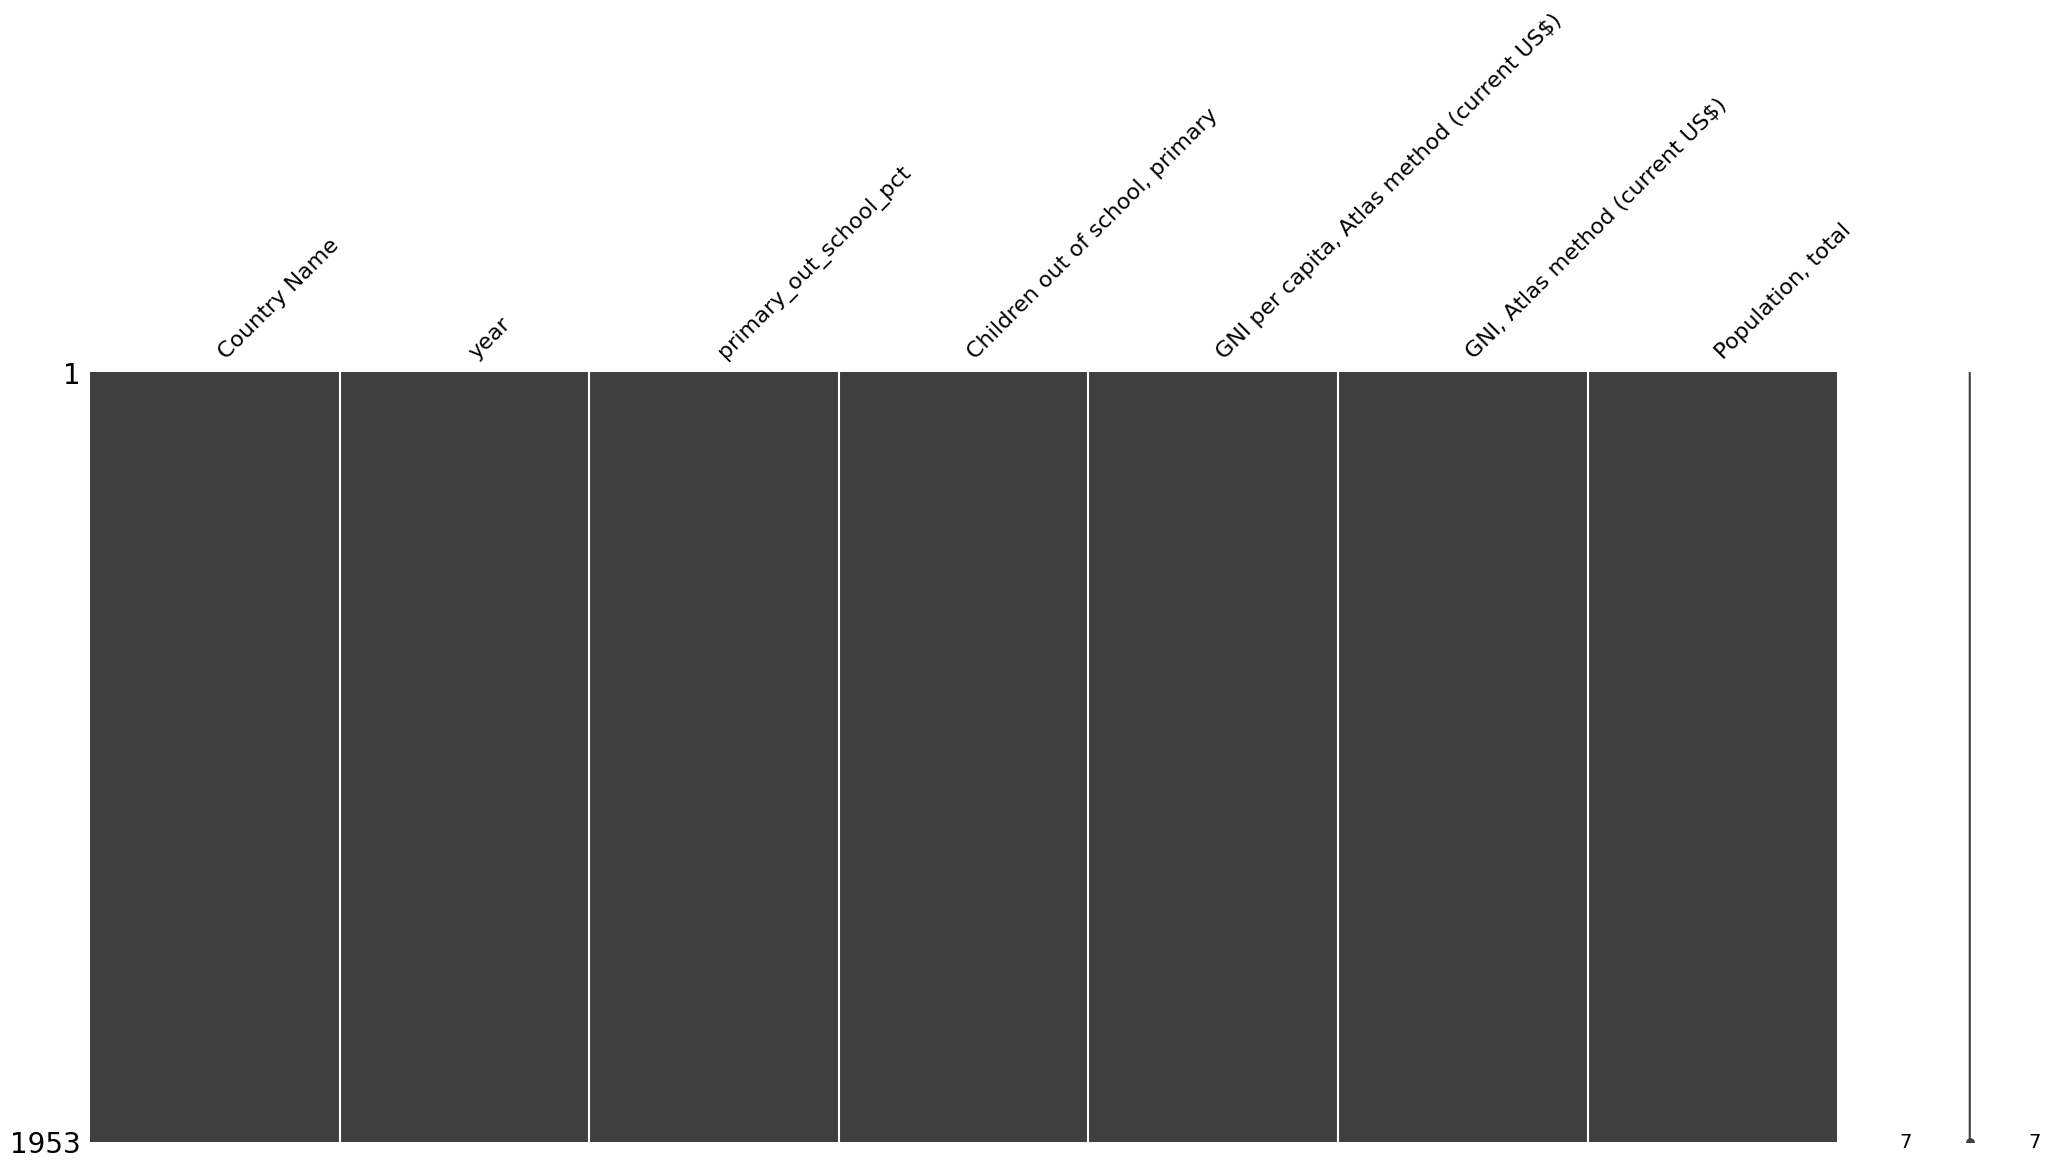

In [243]:
# inspect the missingness
msno.matrix(df)


In [256]:
# what is going on?
print(df.loc['AFG']['primary_out_school_total'][0])

print(df.columns)


..
Index(['Country Name', 'year', 'primary_out_school_pct',
       'primary_out_school_total',
       'GNI per capita, Atlas method (current US$)',
       'GNI, Atlas method (current US$)', 'Population, total'],
      dtype='object', name='Series Name')


/var/folders/sj/60qhcj1n1zzch8_rq_k0sz940000gn/T/ipykernel_73059/2556798123.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.loc['AFG']['primary_out_school_total'][0])


In [259]:
print(df.columns)

Index(['Country Name', 'year', 'primary_out_school_pct',
       'primary_out_school_total',
       'GNI per capita, Atlas method (current US$)',
       'GNI, Atlas method (current US$)', 'Population, total'],
      dtype='object', name='Series Name')


<Axes: >

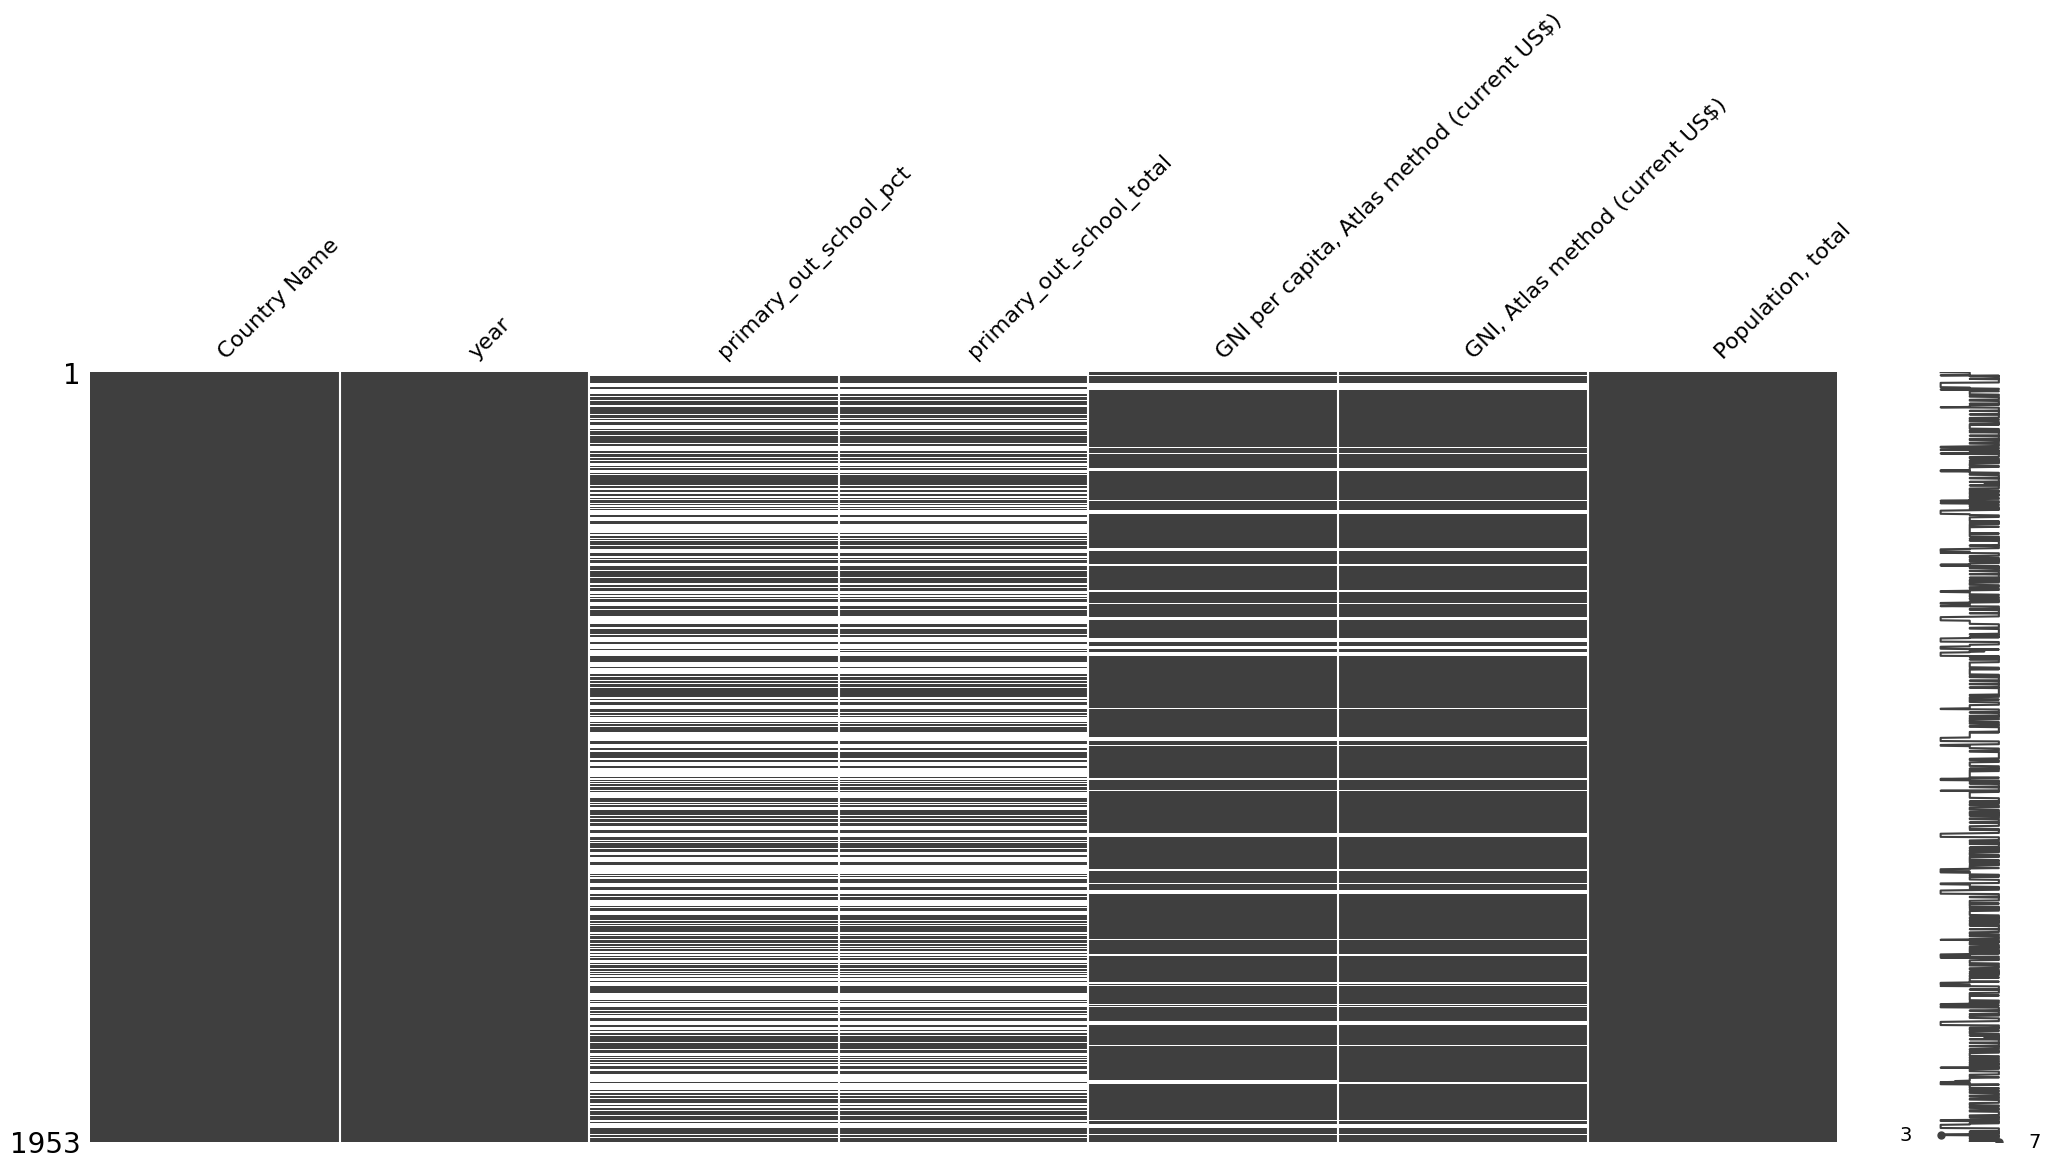

In [266]:
# let's fix it
df.replace('..', np.nan, inplace=True)

msno.matrix(df)

In [267]:
# only keep the rows that don't have missing values

dropped = df.dropna()

# what are we inspecting here?
print(dropped.index.nunique())

184


In [271]:
# sets are useful for finding differences!
diff_iso = set(df['Country Name'].unique()) - set(dropped['Country Name'].unique())
len(diff_iso)
print(diff_iso)

{'Lebanon', 'Somalia', 'Channel Islands', 'Bangladesh', 'French Polynesia', 'Libya', 'Turkmenistan', 'Guam', 'Northern Mariana Islands', 'Malawi', 'Greenland', 'Kiribati', 'New Caledonia', 'Faroe Islands', 'Afghanistan', 'Gibraltar', 'Isle of Man', 'Kosovo', 'American Samoa', 'Gabon', 'Haiti', 'Curacao', 'Monaco', "Korea, Dem. People's Rep.", 'Guinea-Bissau', 'Virgin Islands (U.S.)', 'Congo, Dem. Rep.', 'Sint Maarten (Dutch part)', 'Papua New Guinea', 'Nigeria', 'China', 'British Virgin Islands', 'St. Martin (French part)'}


In [278]:

diff_iso_values = df[df['Country Name'].isin(diff_iso)]
diff_iso_values_sorted = diff_iso_values.sort_values(by='Country Name')

print(diff_iso_values_sorted)


Series Name           Country Name  year primary_out_school_pct  \
isocode                                                           
AFG                    Afghanistan  2001                    NaN   
AFG                    Afghanistan  2002                    NaN   
AFG                    Afghanistan  2003                    NaN   
AFG                    Afghanistan  2011                    NaN   
AFG                    Afghanistan  2012                    NaN   
...                            ...   ...                    ...   
VIR          Virgin Islands (U.S.)  2011                    NaN   
VIR          Virgin Islands (U.S.)  2012                    NaN   
VIR          Virgin Islands (U.S.)  2013                    NaN   
VIR          Virgin Islands (U.S.)  2021                    NaN   
VIR          Virgin Islands (U.S.)  2023                    NaN   

Series Name primary_out_school_total  \
isocode                                
AFG                              NaN   
AFG     

In [ ]:
#dropped.to_csv(cwd + "/data/WB_reshaped_nomissing.csv")

#### 3.3 Groupby


In [279]:
df = dropped.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, ALB to ZWE
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country Name                                982 non-null    object
 1   year                                        982 non-null    object
 2   primary_out_school_pct                      982 non-null    object
 3   primary_out_school_total                    982 non-null    object
 4   GNI per capita, Atlas method (current US$)  982 non-null    object
 5   GNI, Atlas method (current US$)             982 non-null    object
 6   Population, total                           982 non-null    object
dtypes: object(7)
memory usage: 93.7+ KB


In [280]:
df['???'] = df['???'].astype('???')

KeyError: '???'

In [ ]:
df.sample(4)

In [ ]:
# only now we can grouby

df.groupby(['country'])['gni_pc'].agg(['???'])

#### 3.4 Features

In [281]:
df.describe()

Series Name,Country Name,year,primary_out_school_pct,primary_out_school_total,"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
count,982,982,982,982,982,982,982
unique,184,9,973,956,741,982,982
top,Kyrgyz Republic,2012,0,0,710,3906029741,3060173
freq,9,138,7,7,6,1,1


In [ ]:
# df['gni_bil'] = round(df['gni']/1_000_000_000, 3)
# df['pop_mil'] = round(df['gni']/1_000_000, 3)
# df['gni_bil_pc'] = round(df['gni_pc']/1_000_000_000, 3)
# df['prim_oos_pct'] = round(df['gni_pc']/1_000_000_000, 3)

Suppose you estimate that working-age population is roughly 60% of the total population. You can create a dependency ratio:

In [ ]:
df['primary_aged_total'] =
df['primary_aged_of_pop'] = 

# using appy

df['dependency'] = df.apply(
    lambda row: row['primary_out_school_total'] / (row['pop'] * 0.6), axis=1
)

df.sample(3)

In [ ]:
# using a lambda function and mapping a dictionary

income_groups = {
    lambda x: x < 1045: 'low',
    lambda x: 1045 <= x < 4095: 'low_mid',
    lambda x: 4095 <= x < 12695: 'upp_mid',
    lambda x: x >= 12695: 'high'
}

df['income_group'] = df['gni_pc'].map(
    lambda x: next((v for k, v in income_groups.items() if k(x)), None)
)
df.income_group.value_counts()

#### 3.5 Extra

In [ ]:
df_highest_year = df.sort_values('???', ascending=False).drop_duplicates('???')
df_highest_year

In [ ]:
df_highest_year.boxplot(column='???')

In [ ]:
df_highest_year.gni_pc.nlargest(10)

In [ ]:
# show the box plot only for a given income group
df_highest_year.loc[???].boxplot(column='gni_pc')

In [ ]:
groups = ['high', 'upp_mid', 'low_mid', 'low']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == ???].boxplot(column='gni_pc', ax=axes[???])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# compare
df_highest_year.plot.scatter(x='???', y='???')

In [ ]:
# compare
df_highest_year.

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    ???
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

### 4. Background cleaning

In [282]:
df_WB = pd.read_csv(cwd + '/WB_full.csv')
#df_meta = pd.read_csv(cwd + '/data/WB_metadata.csv')

df_WB.head()

,Series Name,Series Code,Country Name,Country Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2011 [YR2011],2012 [YR2012],2013 [YR2013],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


In [283]:
# clean column names
cols_to_clean = df_WB.columns.tolist()
rename_dict = {col: col.split()[0] for col in cols_to_clean if '[YR' in col}
df_WB = df_WB.rename(columns=rename_dict)

The net enrollment rate excludes overage and underage students and more accurately captures the system's coverage and internal efficiency. Differences between the gross enrollment ratio and the net enrollment rate show the incidence of overage and underage enrollments.
https://databank.worldbank.org/metadataglossary/world-development-indicators/series/SE.PRE.ENRR

In [284]:
df_WB['Series Name'].unique()

array(['Population, total',
       'Adolescents out of school (% of lower secondary school age)',
       'Adolescents out of school, female (% of female lower secondary school age)',
       'Adolescents out of school, male (% of male lower secondary school age)',
       'Children out of school (% of primary school age)',
       'Children out of school, male (% of male primary school age)',
       'Children out of school, female (% of female primary school age)',
       'Children out of school, primary',
       'Children out of school, primary, female',
       'Children out of school, primary, male',
       'Primary education, pupils',
       'Primary education, pupils (% female)',
       'School enrollment, preprimary (% gross)',
       'School enrollment, preprimary, female (% gross)',
       'School enrollment, preprimary, male (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, primary (% net)',
       'School enrollment, primary (gross), gender par

In [285]:
series_to_keep = ['Population, total',
                  'GNI, Atlas method (current US$)', 'GNI per capita, Atlas method (current US$)',
                  'Children out of school, primary',
                  'Children out of school (% of primary school age)'
                  ]

In [286]:
df_choice = df_WB.loc[df_WB['Series Name'].isin(series_to_keep)]

country_groups = [
    "AFE", "AFW", "ARB", "CSS", "CEB", "EAR", "EAS", "EAP", "TEA", "EMU", 
    "ECS", "ECA", "TEC", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", 
    "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", 
    "MEA", "MNA", "TMN", "MIC", "NAC", "INX", "OED", "OSS", "PSS", "PST", 
    "PRE", "SST", "SAS", "TSA", "SSF", "SSA", "TSS", "UMC"]

world = ["WLD"]

filtered_df = df_choice[~df_choice['Country Code'].isin(country_groups + world)]

# download data
#filtered_df.to_csv(cwd + '/data/WB_more_data.csv', index=False)

In [287]:
filtered_df.sample(5)

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
16688,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,Trinidad and Tobago,TTO,7724961290.43528,8637593081.25417,10361260386.4231,20001165158.6202,24158091956.0322,27165850354.9923,22659904897.3483,24788547091.6524,27538750899.8188
16551,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,El Salvador,SLV,11575739685.992,11942491886.5306,12738311030.1784,18997876825.8604,20050830424.8133,20962312688.0234,27385712597.1189,29567777825.4441,31320391044.6756
171,"Population, total",SP.POP.TOTL,Singapore,SGP,4138012,4175950,4114826,5183688,5312437,5399162,5453566,5637022,5917648
183,"Population, total",SP.POP.TOTL,St. Martin (French part),MAF,30387,31160,31929,36350,36026,35639,31948,31791,32077
1147,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Guyana,GUY,..,..,8.065110206604,0.225940003991127,0.428880006074905,..,17.2138404846191,..,..


In [ ]:
# use renaming dictionary
print (df)
rename_dict = {
    'Country Code' : 'isocode'
}
print (df.columns)
df.rename(columns=rename_dict, inplace=True)

df.set_index('isocode', inplace= True)
print (df)

In [ ]:
# round to two decimal places

df['primary_out_school_pct'] = round(df['primary_out_school_pct'],2)
df

In [ ]:
# inspect the missingness
msno.matrix(df)


In [ ]:
# what is going on?
print(df.loc['AFG']['primary_out_school_total'][0])

In [ ]:
# let's fix it
df.replace(???, np.nan, inplace=True)

msno.matrix(df)

In [ ]:
# only keep the rows that don't have missing values

dropped = df.???()

# what are we inspecting here?
print(dropped.index.nunique())

In [ ]:
# sets are useful for finding differences!
diff_iso = set(df.country.unique()) - set(dropped.country.unique())
len(diff_iso)
print(diff_iso)

In [ ]:
#dropped.to_csv(cwd + "/data/WB_reshaped_nomissing.csv")

#### 3.3 Groupby


In [289]:
df = dropped.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, ALB to ZWE
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country Name                                982 non-null    object
 1   year                                        982 non-null    object
 2   primary_out_school_pct                      982 non-null    object
 3   primary_out_school_total                    982 non-null    object
 4   GNI per capita, Atlas method (current US$)  982 non-null    object
 5   GNI, Atlas method (current US$)             982 non-null    object
 6   Population, total                           982 non-null    object
dtypes: object(7)
memory usage: 93.7+ KB


In [ ]:
df['???'] = df['???'].astype('???')

In [ ]:
df.sample(4)

In [ ]:
# only now we can grouby

df.groupby(['country'])['gni_pc'].agg(['???'])

#### 3.4 Features

In [290]:
df.describe()

Series Name,Country Name,year,primary_out_school_pct,primary_out_school_total,"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
count,982,982,982,982,982,982,982
unique,184,9,973,956,741,982,982
top,Kyrgyz Republic,2012,0,0,710,3906029741,3060173
freq,9,138,7,7,6,1,1


In [ ]:
# df['gni_bil'] = round(df['gni']/1_000_000_000, 3)
# df['pop_mil'] = round(df['gni']/1_000_000, 3)
# df['gni_bil_pc'] = round(df['gni_pc']/1_000_000_000, 3)
# df['prim_oos_pct'] = round(df['gni_pc']/1_000_000_000, 3)

Suppose you estimate that working-age population is roughly 60% of the total population. You can create a dependency ratio:

In [ ]:
df['primary_aged_total'] =
df['primary_aged_of_pop'] = 

# using appy

df['dependency'] = df.apply(
    lambda row: row['primary_out_school_total'] / (row['pop'] * 0.6), axis=1
)

df.sample(3)

In [ ]:
# using a lambda function and mapping a dictionary

income_groups = {
    lambda x: x < 1045: 'low',
    lambda x: 1045 <= x < 4095: 'low_mid',
    lambda x: 4095 <= x < 12695: 'upp_mid',
    lambda x: x >= 12695: 'high'
}

df['income_group'] = df['gni_pc'].map(
    lambda x: next((v for k, v in income_groups.items() if k(x)), None)
)
df.income_group.value_counts()

#### 3.5 Extra

In [ ]:
df_highest_year = df.sort_values('???', ascending=False).drop_duplicates('???')
df_highest_year

In [ ]:
df_highest_year.boxplot(column='???')

In [ ]:
df_highest_year.gni_pc.nlargest(10)

In [ ]:
# show the box plot only for a given income group
df_highest_year.loc[???].boxplot(column='gni_pc')

In [ ]:
groups = ['high', 'upp_mid', 'low_mid', 'low']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == ???].boxplot(column='gni_pc', ax=axes[???])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# compare
df_highest_year.plot.scatter(x='???', y='???')

In [ ]:
# compare
df_highest_year.

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    ???
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

### 4. Background cleaning

In [293]:
df_WB = pd.read_csv(cwd + '/WB_full.csv')
#df_meta = pd.read_csv(cwd + '/data/WB_metadata.csv')

df_WB.head()

,Series Name,Series Code,Country Name,Country Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2011 [YR2011],2012 [YR2012],2013 [YR2013],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


In [294]:
# clean column names
cols_to_clean = df_WB.columns.tolist()
rename_dict = {col: col.split()[0] for col in cols_to_clean if '[YR' in col}
df_WB = df_WB.rename(columns=rename_dict)

The net enrollment rate excludes overage and underage students and more accurately captures the system's coverage and internal efficiency. Differences between the gross enrollment ratio and the net enrollment rate show the incidence of overage and underage enrollments.
https://databank.worldbank.org/metadataglossary/world-development-indicators/series/SE.PRE.ENRR

In [295]:
df_WB['Series Name'].unique()

array(['Population, total',
       'Adolescents out of school (% of lower secondary school age)',
       'Adolescents out of school, female (% of female lower secondary school age)',
       'Adolescents out of school, male (% of male lower secondary school age)',
       'Children out of school (% of primary school age)',
       'Children out of school, male (% of male primary school age)',
       'Children out of school, female (% of female primary school age)',
       'Children out of school, primary',
       'Children out of school, primary, female',
       'Children out of school, primary, male',
       'Primary education, pupils',
       'Primary education, pupils (% female)',
       'School enrollment, preprimary (% gross)',
       'School enrollment, preprimary, female (% gross)',
       'School enrollment, preprimary, male (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, primary (% net)',
       'School enrollment, primary (gross), gender par

In [296]:
series_to_keep = ['Population, total',
                  'GNI, Atlas method (current US$)', 'GNI per capita, Atlas method (current US$)',
                  'Children out of school, primary',
                  'Children out of school (% of primary school age)'
                  ]

In [297]:
df_choice = df_WB.loc[df_WB['Series Name'].isin(series_to_keep)]

country_groups = [
    "AFE", "AFW", "ARB", "CSS", "CEB", "EAR", "EAS", "EAP", "TEA", "EMU", 
    "ECS", "ECA", "TEC", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", 
    "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", 
    "MEA", "MNA", "TMN", "MIC", "NAC", "INX", "OED", "OSS", "PSS", "PST", 
    "PRE", "SST", "SAS", "TSA", "SSF", "SSA", "TSS", "UMC"]

world = ["WLD"]

filtered_df = df_choice[~df_choice['Country Code'].isin(country_groups + world)]

# download data
#filtered_df.to_csv(cwd + '/data/WB_more_data.csv', index=False)

In [298]:
filtered_df.sample(5)

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
16340,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Liechtenstein,LIE,68600,65420,68800,..,..,..,..,..,..
1871,"Children out of school, primary",SE.PRM.UNER,Aruba,ABW,1,25,56,..,..,..,..,..,..
16551,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,El Salvador,SLV,11575739685.992,11942491886.5306,12738311030.1784,18997876825.8604,20050830424.8133,20962312688.0234,27385712597.1189,29567777825.4441,31320391044.6756
1862,"Children out of school, primary",SE.PRM.UNER,Afghanistan,AFG,..,..,..,..,..,..,..,..,..
2046,"Children out of school, primary",SE.PRM.UNER,St. Vincent and the Grenadines,VCT,224,747,949,107,26,66.0479965209961,..,188.910003662109,..
